In [1]:
# this jupyer code regression the dataset by name insurance
# this regression use Tensorflow package

# Import the packages
# Import dataset 
# Normalize & change categorical features into numerical 
# define a SGD model and fit the model on dataset

### Import packages


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# machine learning 
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Insert dataset from github websie here 

In [3]:
# use a dataset by github address
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),   # Normalize (between 0, 1) numeric values 
    (OneHotEncoder(handle_unknown = "ignore"), 
     ["sex", "smoker", "region"]), # Change categorical fetures to numerical, just for inputes(x)
)

#  Create x, y (input & output)
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Split the datset into training and test parts (we can suppose validation part)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42) # .2 test .8 train

# fit the ct on train
ct.fit(x_train)


# Transform inputs (train & test) by transformer
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

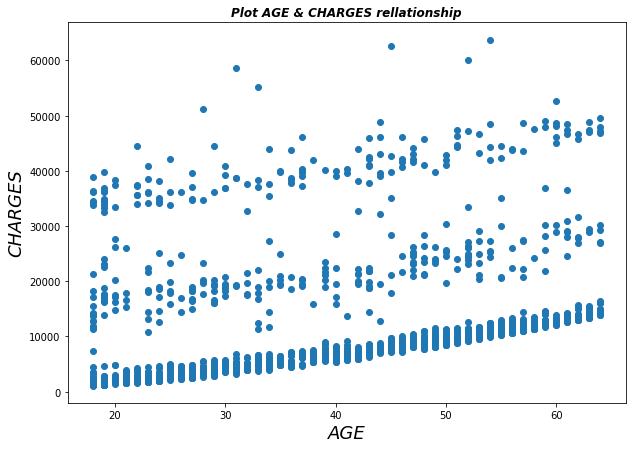

In [5]:
# plot the dataset with one of x and y
# Input 
x = insurance["age"] # use bmi becuse this feature has mor detail(its not categorical)
#outpu
y = insurance["charges"] # its target(for regression)

# visiualize the x, y
plt.figure(figsize = (10, 7))
plt.scatter(x, y)
plt.xlabel('AGE', fontsize = 18, style = 'italic' )
plt.ylabel('CHARGES', fontsize = 18, style = 'italic' )
plt.title('Plot AGE & CHARGES rellationship', style = 'italic', weight = 'bold')
plt.show()

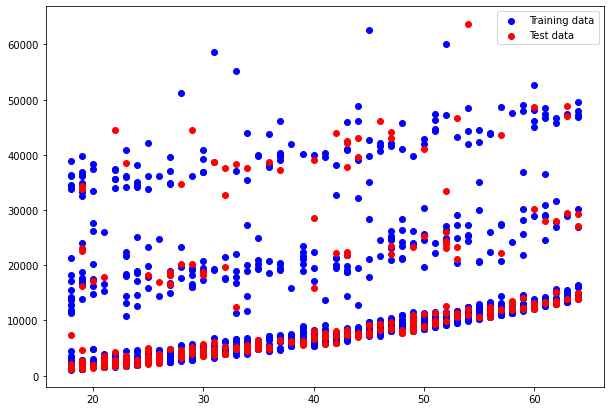

In [6]:
plt.figure(figsize = (10, 7))

# Plot training data in blue
plt.scatter(x_train["age"], y_train, c = 'b', label = 'Training data')

# plot tets data in green
plt.scatter(x_test["age"], y_test, c = 'r', label = 'Test data ')

plt.legend();

### define first model of NN by tensorflow (tensorflow Regresion)

In [7]:
# model_1

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # just output
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history1 = model_1.fit(x_train_normal, y_train, epochs = 10) # Iteration is 10

Epoch 1/10
34/34 [==============================] - 1s 2ms/step - loss: 13345.8154 - mae: 13345.8154
Epoch 2/10
34/34 [==============================] - 0s 1ms/step - loss: 13344.8486 - mae: 13344.8486
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 13343.8818 - mae: 13343.8818
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 13342.9160 - mae: 13342.9160
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 13341.9492 - mae: 13341.9492
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 13340.9814 - mae: 13340.9814
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 13340.0166 - mae: 13340.0166
Epoch 8/10
34/34 [==============================] - 0s 3ms/step - loss: 13339.0498 - mae: 13339.0498
Epoch 9/10
34/34 [==============================] - 0s 3ms/step - loss: 13338.0820 - mae: 13338.0820
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 13337.1152 - mae: 

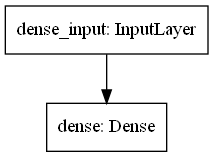

In [8]:
# plot the NN
plot_model(model_1)

In [9]:
# the model summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [10]:
# predic test part 
model_1_pred = model_1.predict(x_test_normal)

In [11]:
# Make a function for MAE & MSE

def mae(y_true, y_pred):
    
    return tf.metrics.mean_absolute_error(y_true = y_test, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    
    return tf.metrics.mean_squared_error(y_true = y_test, 
                                        y_pred = tf.squeeze(y_pred))

In [12]:
# plotting function 

def plot_prediction(trainData = x_train_normal[:,0], #Age
                   trainLabels = y_train,
                   testData = x_test_normal[:,0], # Age
                   testLabels = y_test,
                   predictions = model_1_pred):
    
    plt.figure(figsize = (10, 7))
    plt.scatter(trainData, trainLabels, c = 'b', label = 'Training Data')
    plt.scatter(testData, testLabels, c = 'g', label = 'Test Data')
    plt.scatter(testData, predictions, c = 'r', label = 'Predictions')
    plt.legend();

*************************************************************
------------------- Error -----------------------------------
MAE for model_1 is 12958.8642578125 and that MSE is 323190432.0
*************************************************************
*************************************************************


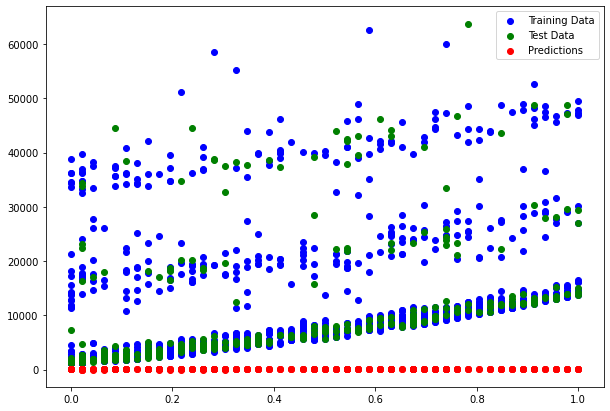

In [13]:
# plot model_1 Results
model_1_pred = model_1.predict(x_test_normal)
plot_prediction(predictions = model_1_pred)

mae_1 = mae(y_test, model_1_pred)
mse_1 = mse(y_test, model_1_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_1 is {} and that MSE is {}".format(mae_1, mse_1))
print("*************************************************************")
print("*************************************************************")


In [14]:
# model_2

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # just output
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history2 = model_2.fit(x_train_normal, y_train, epochs = 100) # Iteration is 100 --- more iteration 

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13345.8154 - mae: 13345.8154
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.8486 - mae: 13344.8486
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13343.8818 - mae: 13343.8818
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.9160 - mae: 13342.9160
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13341.9492 - mae: 13341.9492
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13340.9814 - mae: 13340.9814
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13340.0166 - mae: 13340.0166
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13339.0498 - mae: 13339.0498
Epoch 9/100
34/34 [==============================] - ETA: 0s - loss: 13364.2607 - mae: 13364.260 - 0s 2ms/step - loss: 13338.0820 - mae: 13338.0820
Epoch 10/100
34/34 [================

34/34 [==============================] - 0s 2ms/step - loss: 13270.4238 - mae: 13270.4238
Epoch 80/100
34/34 [==============================] - 0s 2ms/step - loss: 13269.4570 - mae: 13269.4570
Epoch 81/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.4893 - mae: 13268.4893
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.5273 - mae: 13267.5273
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 13266.5576 - mae: 13266.5576
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 13265.5918 - mae: 13265.5918
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 13264.6250 - mae: 13264.6250
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 13263.6582 - mae: 13263.6582
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 13262.6914 - mae: 13262.6914
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 13261.7256 -

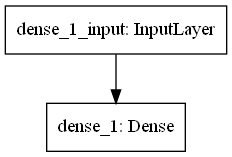

In [15]:
# plot the NN
plot_model(model_2)

In [16]:
# the model summary 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [17]:
# predic test part 
model_2_pred = model_2.predict(x_test_normal)

*************************************************************
------------------- Error -----------------------------------
MAE for model_2 is 12871.9619140625 and that MSE is 321039712.0
*************************************************************
*************************************************************


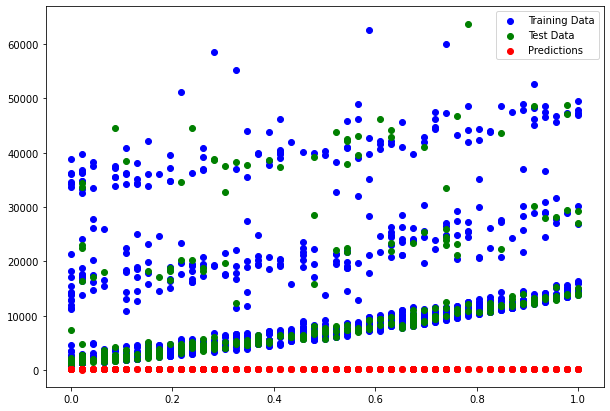

In [18]:
# plot model_1 Results
model_2_pred = model_2.predict(x_test_normal)
plot_prediction(predictions = model_2_pred)

mae_2 = mae(y_test, model_2_pred)
mse_2 = mse(y_test, model_2_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_2 is {} and that MSE is {}".format(mae_2, mse_2))
print("*************************************************************")
print("*************************************************************")


In [19]:
# model_3

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),  # hidden output
    tf.keras.layers.Dense(1)  #  output
])

# Compile the model
model_3.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history3 = model_3.fit(x_train_normal, y_train, epochs = 10) # Iteration is 10

Epoch 1/10
34/34 [==============================] - 1s 2ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 13325.8730 - mae: 13325.8730
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 11604.6348 - mae: 11604.6348
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: 9815.3799 - mae: 9815.3799
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 8165.9160 - mae: 8165.

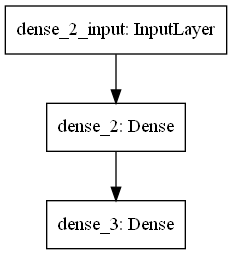

In [20]:
# plot the NN
plot_model(model_3)

In [21]:
# the model summary 
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_3 is 8268.5263671875 and that MSE is 171535920.0
*************************************************************
*************************************************************


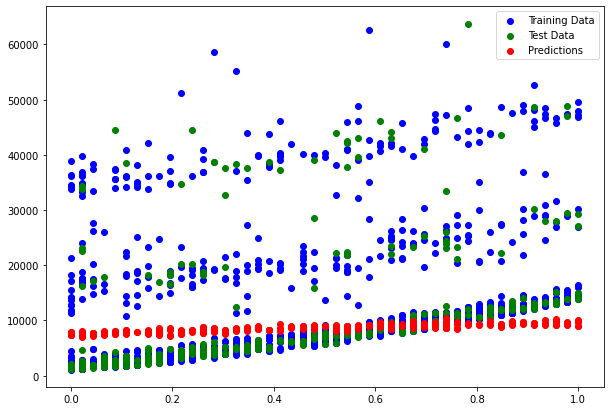

In [22]:
# plot model_1 Results
model_3_pred = model_3.predict(x_test_normal)
plot_prediction(predictions = model_3_pred)

mae_3 = mae(y_test, model_3_pred)
mse_3 = mse(y_test, model_3_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_3 is {} and that MSE is {}".format(mae_3, mse_3))
print("*************************************************************")
print("*************************************************************")


In [23]:
# model_4

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),  # hidden output
    tf.keras.layers.Dense(1)  #  output
])

# Compile the model
model_4.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history4 = model_4.fit(x_train_normal, y_train, epochs = 100) # Iteration is 100

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13325.8730 - mae: 13325.8730
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11604.6348 - mae: 11604.6348
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 9815.3799 - mae: 9815.3799
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8165.9160 - 

34/34 [==============================] - 0s 2ms/step - loss: 3485.0234 - mae: 3485.0234
Epoch 82/100
34/34 [==============================] - 0s 2ms/step - loss: 3486.6616 - mae: 3486.6616
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3495.8218 - mae: 3495.8218
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3480.0281 - mae: 3480.0281
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3485.9910 - mae: 3485.9910
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3483.8474 - mae: 3483.8474
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.1558 - mae: 3488.1558
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3495.9912 - mae: 3495.9912
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.3540 - mae: 3488.3540
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3494.0820 - mae: 3494.0820
Epo

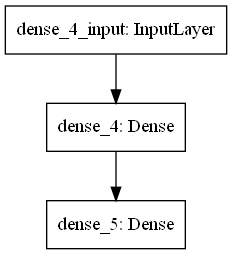

In [24]:
# plot the NN
plot_model(model_4)

In [25]:
# the model summary 
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_4 is 3170.048828125 and that MSE is 43316004.0
*************************************************************
*************************************************************


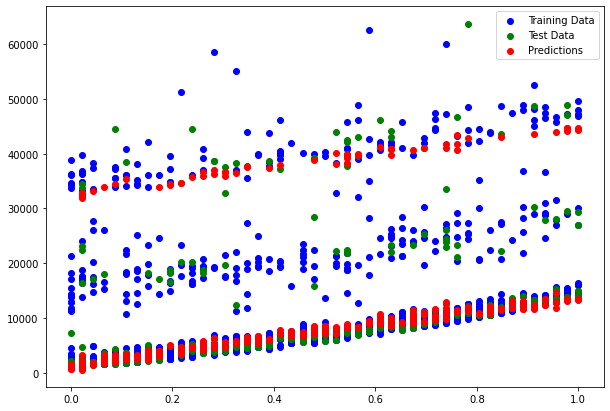

In [26]:
# plot model_1 Results
model_4_pred = model_4.predict(x_test_normal)
plot_prediction(predictions = model_4_pred)

mae_4 = mae(y_test, model_4_pred)
mse_4 = mse(y_test, model_4_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_4 is {} and that MSE is {}".format(mae_4, mse_4))
print("*************************************************************")
print("*************************************************************")


In [27]:
# model_5

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # hidden layer 1 
    tf.keras.layers.Dense(10), # hidden layer 2
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_5.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history5 = model_5.fit(x_train_normal, y_train, epochs = 100) # Iteration is 10

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.3955 - mae: 13344.3955
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13248.8564 - mae: 13248.8564
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7396.1123 - mae: 7396.1123
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 5709.8159 - mae: 5709.8159
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 5303.5747 - mae: 5303.5747
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 5496.5625 - mae: 5496.5625
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 5113.8467 - mae: 5113.8467
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 5645.9658 - mae: 5645.9658
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5065.5356 - mae: 5065.5356
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4981.5952 - mae: 4981.

34/34 [==============================] - 0s 2ms/step - loss: 5308.6235 - mae: 5308.6235
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5139.7446 - mae: 5139.7446
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 4912.1050 - mae: 4912.1050
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 4618.1211 - mae: 4618.1211
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 4933.3647 - mae: 4933.3647
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 5213.6904 - mae: 5213.6904
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 4982.9209 - mae: 4982.9209
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 4875.8657 - mae: 4875.8657
Epoch 90/100
34/34 [==============================] - ETA: 0s - loss: 4905.5234 - mae: 4905.523 - 0s 2ms/step - loss: 4810.9141 - mae: 4810.9141
Epoch 91/100
34/34 [==============================] - 0s 2ms

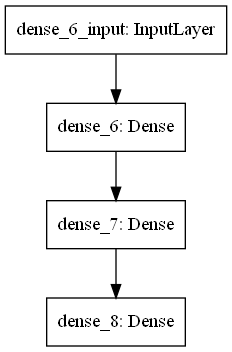

In [28]:
# plot the NN
plot_model(model_5)

In [29]:
# the model summary 
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_5 is 6771.3212890625 and that MSE is 96551144.0
*************************************************************
*************************************************************


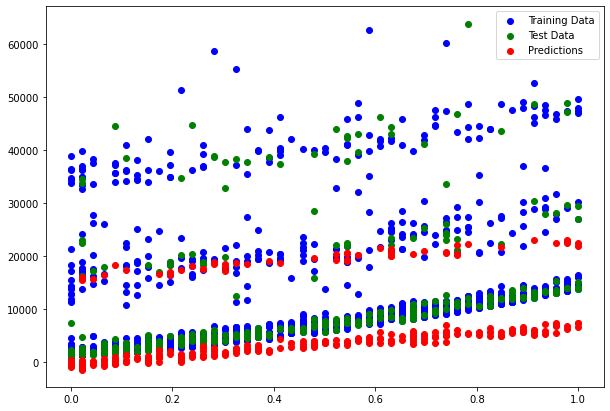

In [30]:
# plot model_1 Results
model_5_pred = model_5.predict(x_test_normal)
plot_prediction(predictions = model_5_pred)

mae_5 = mae(y_test, model_5_pred)
mse_5 = mse(y_test, model_5_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_5 is {} and that MSE is {}".format(mae_5, mse_5))
print("*************************************************************")
print("*************************************************************")


In [31]:
# model_6

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(20), # hidden layer 1 --20
    tf.keras.layers.Dense(10), # hidden layer 2
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_6.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history6 = model_6.fit(x_train_normal, y_train, epochs = 100) # Iteration is 10

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13342.8848 - mae: 13342.8848
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12512.0859 - mae: 12512.0859
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6619.5444 - mae: 6619.5444
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 5648.7256 - mae: 5648.7256
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5231.0117 - mae: 5231.0117
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5279.5020 - mae: 5279.5020
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 4901.3276 - mae: 4901.3276
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 5225.7495 - mae: 5225.7495
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 5233.7163 - mae: 5233.7163
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 5180.9321 - mae: 5180.

34/34 [==============================] - 0s 2ms/step - loss: 5590.5000 - mae: 5590.5000
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 5080.7212 - mae: 5080.7212
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 4884.6094 - mae: 4884.6094
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 4871.2070 - mae: 4871.2070
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5095.9854 - mae: 5095.9854
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 4763.5195 - mae: 4763.5195
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 4880.2388 - mae: 4880.2388
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 4791.1426 - mae: 4791.1426
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 4840.7227 - mae: 4840.7227
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5458.8936 - mae: 5458.8936
Epo

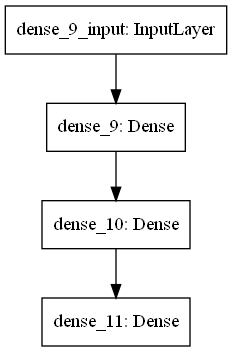

In [32]:
# plot the NN
plot_model(model_6)

In [33]:
# the model summary 
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_6 is 3538.295166015625 and that MSE is 36134680.0
*************************************************************
*************************************************************


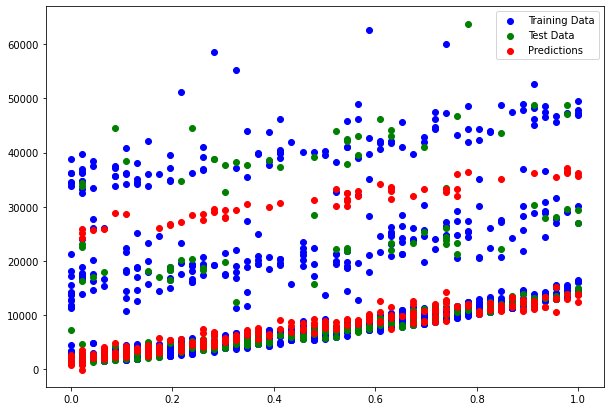

In [34]:
# plot model_1 Results
model_6_pred = model_6.predict(x_test_normal)
plot_prediction(predictions = model_6_pred)

mae_6 = mae(y_test, model_6_pred)
mse_6 = mse(y_test, model_6_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_6 is {} and that MSE is {}".format(mae_6, mse_6))
print("*************************************************************")
print("*************************************************************")


In [35]:
# model_7

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer 1 --100
    tf.keras.layers.Dense(40), # hidden layer 2 -- 40
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_7.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.SGD(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history7 = model_7.fit(x_train_normal, y_train, epochs = 100) # Iteration is 10

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13339.0859 - mae: 13339.0859
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 11005.1895 - mae: 11005.1895
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6056.1572 - mae: 6056.1572
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 5423.4258 - mae: 5423.4258
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5631.6904 - mae: 5631.6904
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5274.4170 - mae: 5274.4170
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 5087.0205 - mae: 5087.0205
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4973.0752 - mae: 4973.0752A: 0s - loss: 5075.4600 - mae: 5075.460
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 4981.8369 - mae: 4981.8369
Epoch 10/100
34/34 [==============================] - 0s 

34/34 [==============================] - 0s 2ms/step - loss: 4749.6602 - mae: 4749.6602
Epoch 81/100
34/34 [==============================] - 0s 4ms/step - loss: 4900.2437 - mae: 4900.2437
Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 5585.8530 - mae: 5585.8530
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 5053.7261 - mae: 5053.7261
Epoch 84/100
34/34 [==============================] - ETA: 0s - loss: 4779.8823 - mae: 4779.882 - 0s 2ms/step - loss: 4902.6665 - mae: 4902.6665
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 4722.5161 - mae: 4722.5161
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5100.6157 - mae: 5100.6157
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 5253.8877 - mae: 5253.8877
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 4975.7617 - mae: 4975.7617
Epoch 89/100
34/34 [==============================] - 0s 3ms

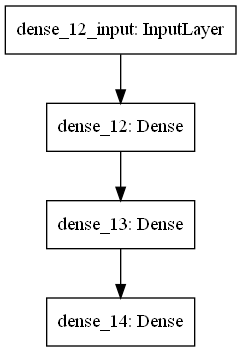

In [36]:
# plot the NN
plot_model(model_7)

In [37]:
# the model summary 
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 41        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_7 is 3551.3642578125 and that MSE is 36078224.0
*************************************************************
*************************************************************


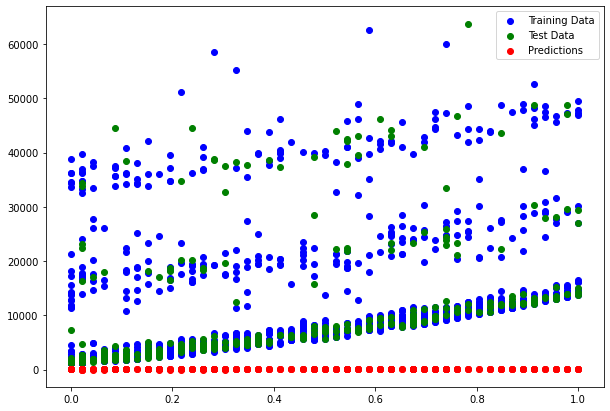

In [38]:
# plot model_7 Results
model_7_pred = model_7.predict(x_test_normal)
plot_prediction(predictions = model_1_pred)

mae_7 = mae(y_test, model_7_pred)
mse_7 = mse(y_test, model_7_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_7 is {} and that MSE is {}".format(mae_7, mse_7))
print("*************************************************************")
print("*************************************************************")


### We can see a complex model by SGD is bad & now tets by Adam 

In [39]:
# model_adam_1

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_adam_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer 1 --100
    tf.keras.layers.Dense(40), # hidden layer 2 -- 40
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_adam_1.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.Adam(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history8 = model_adam_1.fit(x_train_normal, y_train, epochs = 100) # Iteration is 100

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13341.3916 - mae: 13341.3916
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13319.5557 - mae: 13319.5557
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13254.8154 - mae: 13254.8154
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13108.3438 - mae: 13108.3438
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12838.1924 - mae: 12838.1924
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12401.7061 - mae: 12401.7061
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11767.5107 - mae: 11767.5107
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10983.8301 - mae: 10983.8301
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 10176.8369 - mae: 10176.8369
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9396.511

34/34 [==============================] - 0s 3ms/step - loss: 3580.4106 - mae: 3580.4106
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 3576.4189 - mae: 3576.4189
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 3571.5330 - mae: 3571.5330
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 3568.2639 - mae: 3568.2639
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 3565.0364 - mae: 3565.0364
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 3563.8386 - mae: 3563.8386
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 3559.5457 - mae: 3559.5457
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 3559.6729 - mae: 3559.6729
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 3555.1646 - mae: 3555.1646
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 3551.5037 - mae: 3551.5037
Epo

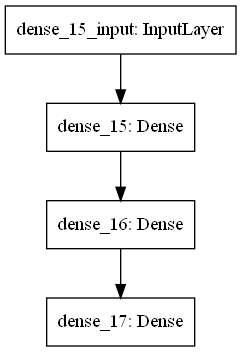

In [40]:
# plot the NN
plot_model(model_adam_1)

In [41]:
# the model summary 
model_adam_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_16 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 41        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_adam_1 is 3257.02978515625 and that MSE is 37454112.0
*************************************************************
*************************************************************


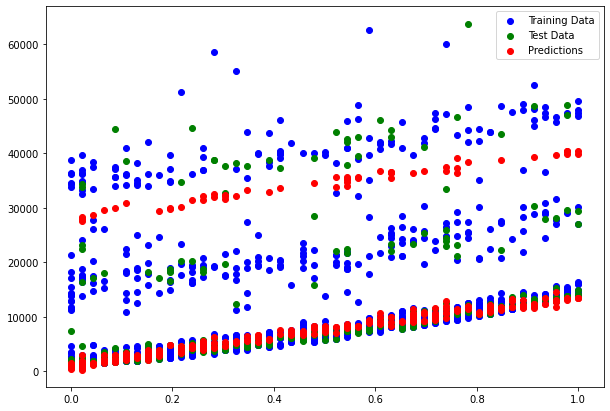

In [42]:
# plot model_1 Results
model_adam_1_pred = model_adam_1.predict(x_test_normal)
plot_prediction(predictions = model_adam_1_pred)

mae_adam_1 = mae(y_test, model_adam_1_pred)
mse_adam_1 = mse(y_test, model_adam_1_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_adam_1 is {} and that MSE is {}".format(mae_adam_1, mse_adam_1))
print("*************************************************************")
print("*************************************************************")


### And now a simple Adam

In [43]:
# model_adam_2

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_adam_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # hidden layer 1 --10
    tf.keras.layers.Dense(10), # hidden layer 2 -- 10
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_adam_2.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.Adam(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history9 = model_adam_2.fit(x_train_normal, y_train, epochs = 100) # Iteration is 100

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13346.2441 - mae: 13346.2441
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13344.7979 - mae: 13344.7979
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.7529 - mae: 13342.7529
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13339.5293 - mae: 13339.5293
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13334.3828 - mae: 13334.3828
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13326.1445 - mae: 13326.1445
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13313.2910 - mae: 13313.2910
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13294.3242 - mae: 13294.3242
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.9688 - mae: 13267.9688
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13233.18

34/34 [==============================] - 0s 3ms/step - loss: 7266.4668 - mae: 7266.4668
Epoch 82/100
34/34 [==============================] - 0s 3ms/step - loss: 7246.3320 - mae: 7246.3320
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7223.1152 - mae: 7223.1152
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7200.7427 - mae: 7200.7427
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 7179.5063 - mae: 7179.5063
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7155.7563 - mae: 7155.7563
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7133.2051 - mae: 7133.2051
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7110.0649 - mae: 7110.0649
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7086.4917 - mae: 7086.4917
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7063.1685 - mae: 7063.1685
Epo

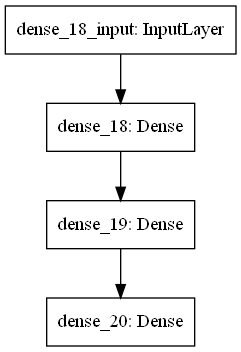

In [44]:
# plot the NN
plot_model(model_adam_2)

In [45]:
# the model summary 
model_adam_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_adam_2 is 7054.63134765625 and that MSE is 119111176.0
*************************************************************
*************************************************************


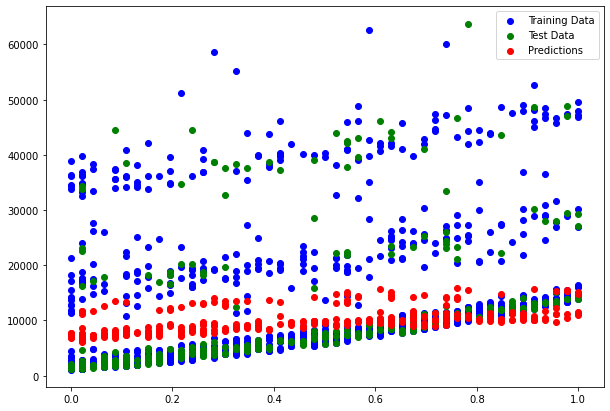

In [46]:
# plot model_1 Results
model_adam_2_pred = model_adam_2.predict(x_test_normal)
plot_prediction(predictions = model_adam_2_pred)

mae_adam_2 = mae(y_test, model_adam_2_pred)
mse_adam_2 = mse(y_test, model_adam_2_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_adam_2 is {} and that MSE is {}".format(mae_adam_2, mse_adam_2))
print("*************************************************************")
print("*************************************************************")


### And now complex Adam model with more Iteration

In [47]:
# model_adam_3

# set Random Seed
tf.random.set_seed(42)

# create a model by TF
model_adam_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer 1 --100
    tf.keras.layers.Dense(40), # hidden layer 2 -- 40
    tf.keras.layers.Dense(1)   # output
])

# Compile the model
model_adam_3.compile(loss = tf.keras.losses.mae, # define loss function by mean absolute error
                optimizer = tf.keras.optimizers.Adam(), # define optimizer by stchastic gradient descent
                metrics = ['mae'] # metric for calculate error
               )

# fit the model on dataset (training part)
history10 = model_adam_3.fit(x_train_normal, y_train, epochs = 500) # Iteration is 100

Epoch 1/500
34/34 [==============================] - 2s 2ms/step - loss: 13341.3916 - mae: 13341.3916
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13319.5557 - mae: 13319.5557
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13254.8154 - mae: 13254.8154
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13108.3438 - mae: 13108.3438
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12838.1924 - mae: 12838.1924
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 12401.7061 - mae: 12401.7061
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 11767.5107 - mae: 11767.5107
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 10983.8301 - mae: 10983.8301
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 10176.8369 - mae: 10176.8369
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 9396.511

34/34 [==============================] - 0s 3ms/step - loss: 3580.4106 - mae: 3580.4106
Epoch 83/500
34/34 [==============================] - 0s 3ms/step - loss: 3576.4189 - mae: 3576.4189
Epoch 84/500
34/34 [==============================] - 0s 2ms/step - loss: 3571.5330 - mae: 3571.5330
Epoch 85/500
34/34 [==============================] - 0s 3ms/step - loss: 3568.2639 - mae: 3568.2639
Epoch 86/500
34/34 [==============================] - 0s 3ms/step - loss: 3565.0364 - mae: 3565.0364
Epoch 87/500
34/34 [==============================] - 0s 3ms/step - loss: 3563.8386 - mae: 3563.8386
Epoch 88/500
34/34 [==============================] - 0s 3ms/step - loss: 3559.5457 - mae: 3559.5457
Epoch 89/500
34/34 [==============================] - 0s 3ms/step - loss: 3559.6729 - mae: 3559.6729
Epoch 90/500
34/34 [==============================] - 0s 2ms/step - loss: 3555.1646 - mae: 3555.1646
Epoch 91/500
34/34 [==============================] - 0s 3ms/step - loss: 3551.5037 - mae: 3551.5037
Epo

34/34 [==============================] - 0s 3ms/step - loss: 3473.7441 - mae: 3473.7441
Epoch 163/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.3896 - mae: 3473.3896
Epoch 164/500
34/34 [==============================] - 0s 3ms/step - loss: 3477.1821 - mae: 3477.1821
Epoch 165/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.1519 - mae: 3473.1519
Epoch 166/500
34/34 [==============================] - 0s 2ms/step - loss: 3473.8083 - mae: 3473.8083
Epoch 167/500
34/34 [==============================] - 0s 2ms/step - loss: 3474.0005 - mae: 3474.0005
Epoch 168/500
34/34 [==============================] - 0s 2ms/step - loss: 3473.4753 - mae: 3473.4753
Epoch 169/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.2542 - mae: 3472.2542
Epoch 170/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.4800 - mae: 3473.4800
Epoch 171/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.6953 - mae: 3472

34/34 [==============================] - 0s 3ms/step - loss: 3474.9512 - mae: 3474.9512
Epoch 243/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.0535 - mae: 3473.0535
Epoch 244/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.5808 - mae: 3475.5808
Epoch 245/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.9231 - mae: 3472.9231
Epoch 246/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.5947 - mae: 3475.5947
Epoch 247/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.7341 - mae: 3473.7341
Epoch 248/500
34/34 [==============================] - 0s 3ms/step - loss: 3476.1787 - mae: 3476.1787
Epoch 249/500
34/34 [==============================] - 0s 3ms/step - loss: 3478.2866 - mae: 3478.2866
Epoch 250/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.7490 - mae: 3473.7490
Epoch 251/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.5361 - mae: 3472

34/34 [==============================] - 0s 2ms/step - loss: 3476.0107 - mae: 3476.0107
Epoch 323/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.0793 - mae: 3473.0793
Epoch 324/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.1472 - mae: 3473.1472
Epoch 325/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.0569 - mae: 3475.0569
Epoch 326/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.0610 - mae: 3475.0610
Epoch 327/500
34/34 [==============================] - 0s 3ms/step - loss: 3478.6213 - mae: 3478.6213
Epoch 328/500
34/34 [==============================] - ETA: 0s - loss: 3473.8474 - mae: 3473.847 - 0s 2ms/step - loss: 3474.6497 - mae: 3474.6497
Epoch 329/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.8865 - mae: 3473.8865
Epoch 330/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.7812 - mae: 3475.7812
Epoch 331/500
34/34 [==============================]

34/34 [==============================] - 0s 2ms/step - loss: 3473.9658 - mae: 3473.9658
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 3474.4204 - mae: 3474.4204
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 3472.2603 - mae: 3472.2603
Epoch 405/500
34/34 [==============================] - 0s 3ms/step - loss: 3474.5981 - mae: 3474.5981
Epoch 406/500
34/34 [==============================] - 0s 2ms/step - loss: 3474.4604 - mae: 3474.4604
Epoch 407/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.7683 - mae: 3472.7683
Epoch 408/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.2222 - mae: 3473.2222
Epoch 409/500
34/34 [==============================] - 0s 3ms/step - loss: 3474.8660 - mae: 3474.8660
Epoch 410/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.0471 - mae: 3475.0471
Epoch 411/500
34/34 [==============================] - 0s 3ms/step - loss: 3474.7466 - mae: 3474

34/34 [==============================] - 0s 4ms/step - loss: 3475.3306 - mae: 3475.3306
Epoch 483/500
34/34 [==============================] - 0s 2ms/step - loss: 3474.7446 - mae: 3474.7446
Epoch 484/500
34/34 [==============================] - 0s 3ms/step - loss: 3474.2917 - mae: 3474.2917
Epoch 485/500
34/34 [==============================] - 0s 3ms/step - loss: 3473.7224 - mae: 3473.7224
Epoch 486/500
34/34 [==============================] - 0s 3ms/step - loss: 3479.3447 - mae: 3479.3447
Epoch 487/500
34/34 [==============================] - 0s 3ms/step - loss: 3477.7905 - mae: 3477.7905
Epoch 488/500
34/34 [==============================] - 0s 3ms/step - loss: 3471.8706 - mae: 3471.8706
Epoch 489/500
34/34 [==============================] - 0s 3ms/step - loss: 3472.9138 - mae: 3472.9138
Epoch 490/500
34/34 [==============================] - 0s 3ms/step - loss: 3475.2173 - mae: 3475.2173
Epoch 491/500
34/34 [==============================] - 0s 3ms/step - loss: 3474.4880 - mae: 3474

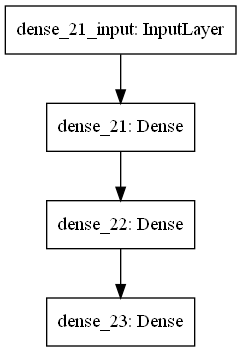

In [48]:
# plot the NN
plot_model(model_adam_3)

In [49]:
# the model summary 
model_adam_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 41        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


*************************************************************
------------------- Error -----------------------------------
MAE for model_adam_3 is 3166.3662109375 and that MSE is 43302704.0
*************************************************************
*************************************************************


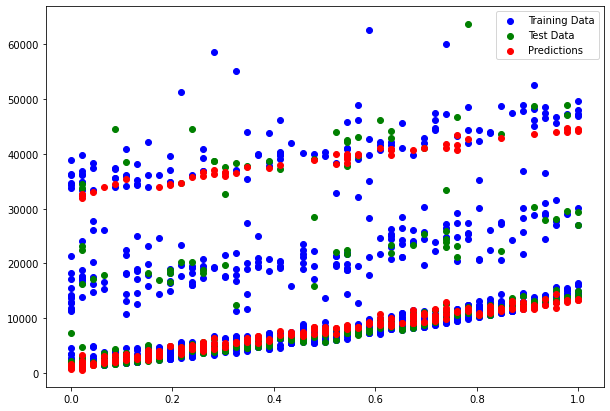

In [50]:
# plot model_1 Results
model_adam_3_pred = model_adam_3.predict(x_test_normal)
plot_prediction(predictions = model_adam_3_pred)

mae_adam_3 = mae(y_test, model_adam_3_pred)
mse_adam_3 = mse(y_test, model_adam_3_pred)

print("*************************************************************")
print("------------------- Error -----------------------------------")
print("MAE for model_adam_3 is {} and that MSE is {}".format(mae_adam_3, mse_adam_3))
print("*************************************************************")
print("*************************************************************")


#### compare Results by curve and values

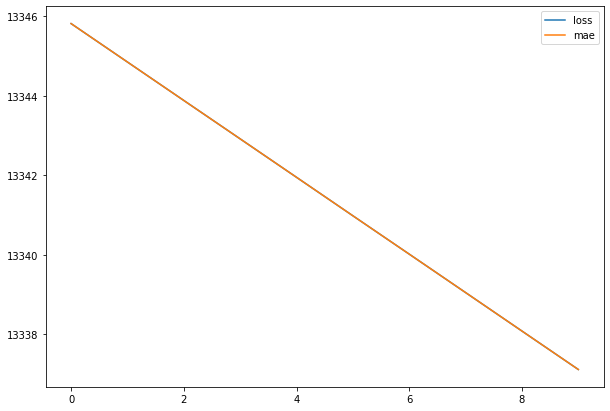

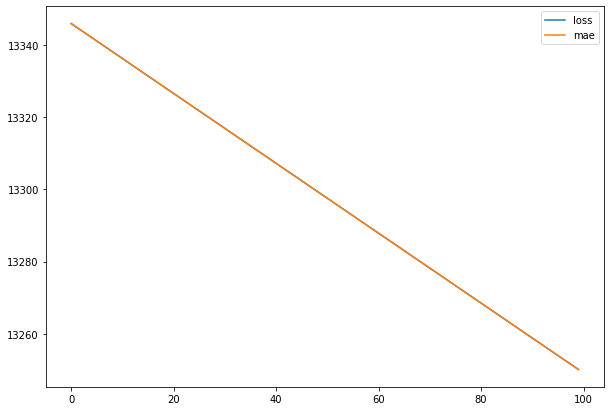

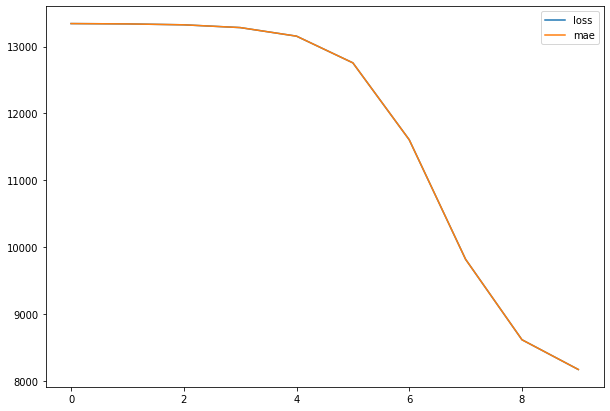

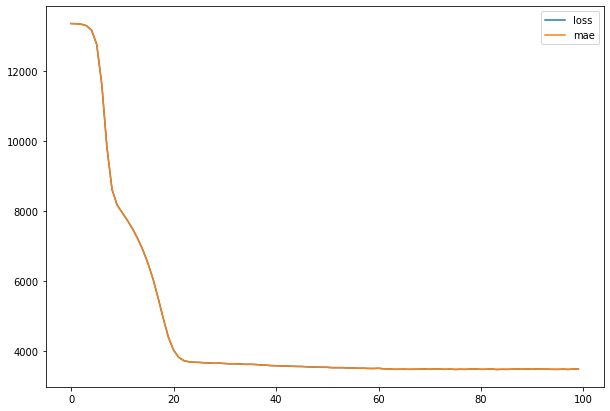

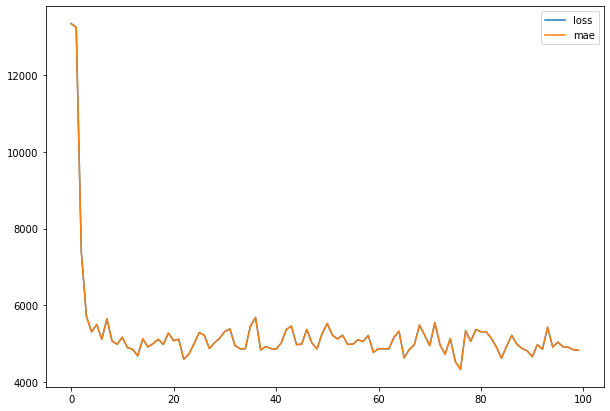

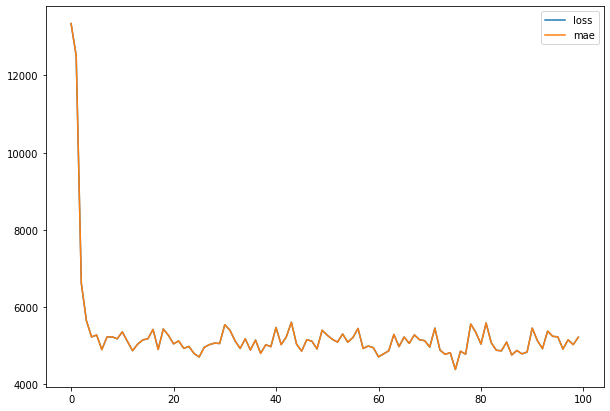

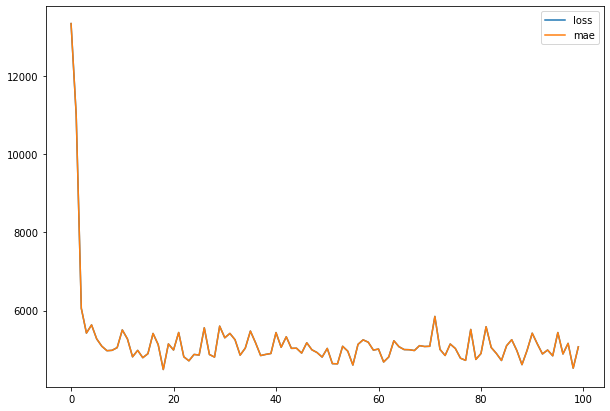

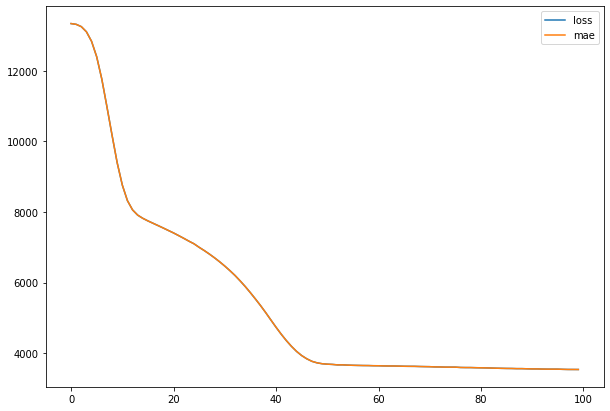

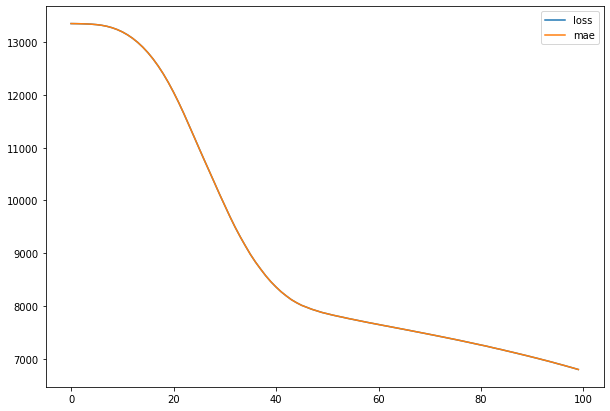

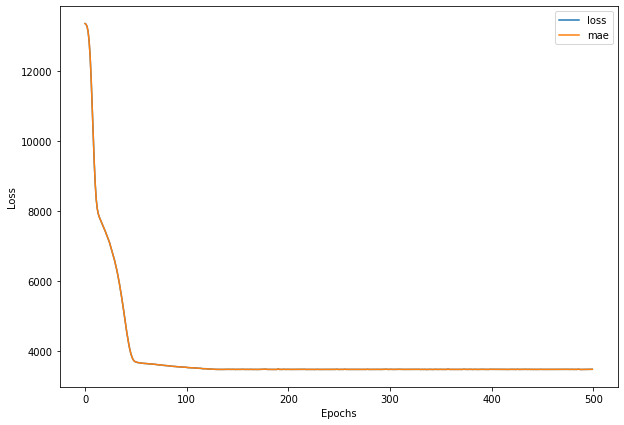

In [51]:
# plot history (loss curve or training curve)

pd.DataFrame(history1.history).plot(figsize = (10, 7))
pd.DataFrame(history2.history).plot(figsize = (10, 7))
pd.DataFrame(history3.history).plot(figsize = (10, 7))
pd.DataFrame(history4.history).plot(figsize = (10, 7))
pd.DataFrame(history5.history).plot(figsize = (10, 7))
pd.DataFrame(history6.history).plot(figsize = (10, 7))
pd.DataFrame(history7.history).plot(figsize = (10, 7))
pd.DataFrame(history8.history).plot(figsize = (10, 7))
pd.DataFrame(history9.history).plot(figsize = (10, 7))
pd.DataFrame(history10.history).plot(figsize = (10, 7))

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [52]:
# Compare Results together

model_Results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                ['model_3', mae_3.numpy(), mse_3.numpy()],
                ['model_4', mae_4.numpy(), mse_4.numpy()],
                ['model_5', mae_5.numpy(), mse_5.numpy()],
                ['model_6', mae_6.numpy(), mse_6.numpy()],
                ['model_7', mae_7.numpy(), mse_7.numpy()],
                ['model_adam_1', mae_adam_1.numpy(), mse_adam_1.numpy()],
                 ['model_adam_2', mae_adam_2.numpy(), mse_adam_2.numpy()],
                 ['model_adam_3', mae_adam_3.numpy(), mse_adam_3.numpy()],
                ]

all_results = pd.DataFrame(model_Results, columns = ['Model', 'MAE', 'MSE'])
all_results

,Model,MAE,MSE
0,model_1,12958.864258,323190432.0
1,model_2,12871.961914,321039712.0
2,model_3,8268.526367,171535920.0
3,model_4,3170.048828,43316004.0
4,model_5,6771.321289,96551144.0
5,model_6,3538.295166,36134680.0
6,model_7,3551.364258,36078224.0
7,model_adam_1,3257.029785,37454112.0
8,model_adam_2,7054.631348,119111176.0
9,model_adam_3,3166.366211,43302704.0


### we can chosse model_adam_3 or model_7 as the best model, for outlier importantly model_7 is better and in other hand adam 3 is best
### i choose adam 3 for bets and save that for use in feture as a ready model

In [53]:
model_adam_3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 41        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


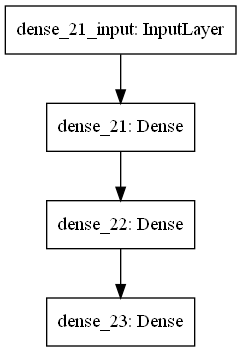

In [54]:
plot_model(model = model_adam_3)

In [55]:
# save model with save method 
model_adam_3.save("insureRegression")

# Save model wih HDF5
model_2.save("insureRegression.h5")

INFO:tensorflow:Assets written to: insureRegression\assets


In [ ]:
### we can load the ready model (we have 2 saved model by two saving method) and use for new instances
### load model is here : 

#Best_model_h5 = tf.keras.models.load_model("BestRegressionWithHDF5.h5")
